In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def load_data(biden_path, low_memory=False):
  biden_df= pd.read_csv(biden_path)
  return  biden_df

In [ ]:
def log_problematic_rows(file_path, expected_columns, encoding='utf-8'):
    problem_rows = []
    with open(file_path, mode='r', encoding=encoding, errors='ignore') as infile:
        reader = csv.reader(infile)
        for line_num, row in enumerate(reader, start=1):
            if len(row) != expected_columns:
                problem_rows.append((line_num, row))  # Log rows with issues
    return problem_rows

In [ ]:
def manually_fix_rows(problem_rows):
    fixed_rows = []
    for line_num, row in problem_rows:
        # Example fix: Remove extra columns or handle specific errors
        # Adjust this part based on the specific issues in your rows
        if len(row) > expected_columns:
            row = row[:expected_columns]  # Trim to expected column count
        fixed_rows.append((line_num, row))
    return fixed_rows

In [ ]:
def preprocess_csv(trump_path, temp_file_path, fixed_rows, encoding='utf-8'):
    with open(trump_path, mode='r', encoding=encoding, errors='ignore') as infile, \
         open(temp_file_path, mode='w', encoding=encoding, newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        fixed_row_dict = {line_num: row for line_num, row in fixed_rows}

        for line_num, row in enumerate(reader, start=1):
            if line_num in fixed_row_dict:
                fixed_row = fixed_row_dict[line_num]
                writer.writerow(fixed_row)
            else:
                writer.writerow(row)

In [ ]:
def load_data(file_path, expected_columns, encoding='utf-8'):
    temp_file_path = 'temp_file.csv'
    # Check for problematic rows
    problem_rows = log_problematic_rows(file_path, expected_columns, encoding)

    # Manually fix the problematic rows
    fixed_rows = manually_fix_rows(problem_rows)

    # Preprocess and fix the CSV
    preprocess_csv(file_path, temp_file_path, fixed_rows, encoding)

    try:
        # Load the cleaned file
        df = pd.read_csv(temp_file_path, low_memory=False, encoding=encoding)
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [ ]:
expected_columns = 21  # Adjust this based on your CSV structure
biden_path= '/content/drive/MyDrive/hashtag_joebiden.csv'
biden_df = load_data(biden_path, expected_columns) # Load Biden data and pass expected_columns
trump_path = '/content/drive/MyDrive/hashtag_donaldtrump.csv'
trump_df = load_data(trump_path, expected_columns, encoding='latin-1') # Load Trump data and pass expected_columns

In [ ]:
def load_and_label_data(trump_path, biden_path, expected_columns):
    # Load each dataset
    trump_df = load_data(trump_path, expected_columns, encoding='latin-1')
    biden_df = load_data(biden_path, expected_columns, encoding='utf-8')

    # Add the Candidate column
    trump_df["Candidate"] = "TRUMP"
    biden_df["Candidate"] = "BIDEN"

    # Concatenate the datasets
    combined_df = pd.concat([trump_df, biden_df], ignore_index=True)

    return combined_df

In [ ]:
def sort_by_date(trump_biden_df, date_column='created_at'):
    # Ensure the date column is properly parsed as datetime
    trump_biden_df[date_column] = pd.to_datetime(trump_biden_df[date_column], errors='coerce')
    return trump_biden_df.sort_values(by=date_column, ignore_index=True)

In [ ]:
combined_df = load_and_label_data(trump_path, biden_path, expected_columns)
trump_biden_df = sort_by_date(combined_df)

In [ ]:
trump_biden_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,BIDEN
2,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
3,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
4,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,TRUMP


In [ ]:
def inspect_df(trump_biden_df):
    # Print the data types of the columns
    print(trump_biden_df.dtypes)
    print(trump_biden_df.head())
    print(trump_biden_df.shape)
    print(trump_biden_df.describe())
    print(trump_biden_df.info())
    return trump_biden_df

In [ ]:
inspect_df(trump_biden_df)

created_at              datetime64[ns]
tweet_id                        object
tweet                           object
likes                           object
retweet_count                  float64
source                          object
user_id                         object
user_name                       object
user_screen_name                object
user_description                object
user_join_date                  object
user_followers_count            object
user_location                   object
lat                             object
long                            object
city                            object
country                         object
continent                       object
state                           object
state_code                      object
collected_at                    object
Candidate                       object
dtype: object
           created_at                tweet_id  \
0 2020-10-15 00:00:01   1.316529221557252e+18   
1 2020-10-15 00:00:01   1.3165

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.000000,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ð Noticias de interÃ©s para latinos de la c...,...,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.000000,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,BIDEN
2,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.000000,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
3,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.000000,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
4,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.000000,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,TRUMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748155,NaT,2010-04-07 02:44:46,3775.0,Veracruz,19.333333,-96.666667,NaN,Mexico,North America,Veracruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BIDEN
1748156,NaT,2010-04-07 02:44:46,3775.0,Veracruz,19.333333,-96.666667,NaN,Mexico,North America,Veracruz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BIDEN
1748157,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BIDEN
1748158,NaT,2011-06-07 18:01:22,6353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BIDEN


In [ ]:
def plot_tweet_distribution(trump_biden_df):
    tweet_counts = trump_biden_df.groupby('Candidate')['tweet'].count()
    ax = tweet_counts.plot.bar(color=['darkblue', 'gold'])  # Updated colors

    # Annotate the bars with the tweet counts
    for i, count in enumerate(tweet_counts):
        ax.text(i, count + 0.05 * count, f'{count}', ha='center', va='bottom')

    plt.ylabel('Number of tweets')
    plt.title('Trump vs Biden Tweets')
    plt.xticks(rotation=0)
    plt.show()

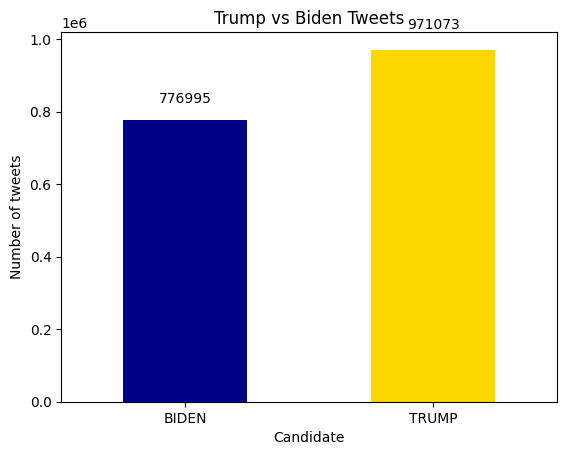

In [ ]:
plot_tweet_distribution(trump_biden_df)

In [ ]:
def plot_mean_likes(trump_biden_df):
    # Convert 'likes' column to numeric, handling non-numeric values
    trump_biden_df['likes'] = pd.to_numeric(trump_biden_df['likes'], errors='coerce')

    # Calculate mean likes for each candidate
    mean_likes = trump_biden_df.groupby('Candidate')['likes'].mean()

    # Create the bar chart with dark blue and gold colors
    ax = mean_likes.plot.bar(color=['#1A237E', '#FFD700'])  # Dark blue and gold

    # Annotate the bars with the mean likes
    for i, mean in enumerate(mean_likes):
        ax.text(i, mean + 0.05 * mean, f'{mean:.2f}', ha='center', va='bottom')

    # Set labels and title
    plt.ylabel('Mean number of Likes')
    plt.title('Trump vs Biden: Mean Likes')
    plt.xticks(rotation=0)

    # Show the plot
    plt.show()

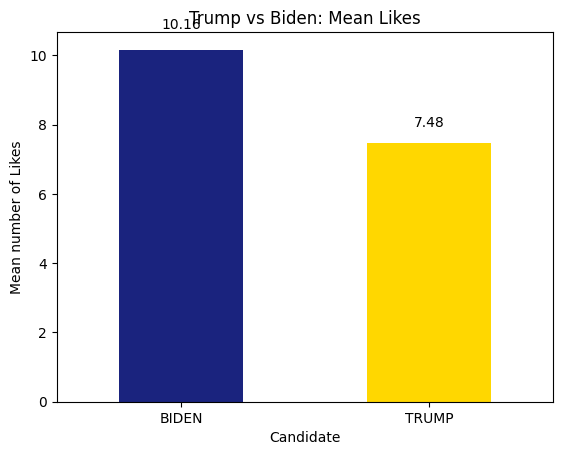

In [ ]:
plot_mean_likes(trump_biden_df)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
def visualize_missing_values(trump_biden_df):
    # Calculate the number of missing values per column
    missing_values = trump_biden_df.isnull().sum()

    # Print the number of missing values per column
    print(missing_values)

    # Custom colormap for missing value heatmap (dark blue, light blue, gold, grey)
    cmap_heatmap = LinearSegmentedColormap.from_list('custom_heatmap', ['darkblue', 'lightblue', 'gold', 'grey'])

    # Visualize the missing values heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(trump_biden_df.isnull(), cbar=False, cmap=cmap_heatmap)
    plt.title('Heatmap of Missing Values')
    plt.show()

    # Bar plot of missing values
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)
    plt.figure(figsize=(12, 6))
    missing_values.plot.bar(color=['darkblue', 'lightblue', 'gold', 'grey'])  # Bar color set to dark blue
    plt.title('Number of Missing Values Per Column')
    plt.grid(axis='y')  # Add a grid behind the bar chart on the y-axis
    plt.show()

    # Calculate the missing value correlation matrix
    missing_corr_matrix = trump_biden_df.isnull().corr()

    # Custom colormap for the correlation matrix
    cmap_corr = LinearSegmentedColormap.from_list('custom_corr', ['darkblue', 'lightblue', 'gold', 'grey'])

    # Plot the missing value correlation matrix
    plt.figure(figsize=(12, 6))
    sns.heatmap(missing_corr_matrix, annot=True, cmap=cmap_corr, cbar=True)
    plt.title('Correlation Matrix of Missing Values')
    plt.show()

created_at                  355
tweet_id                     92
tweet                        92
likes                       365
retweet_count               332
source                     1921
user_id                     342
user_name                   379
user_screen_name            332
user_description         183617
user_join_date              597
user_followers_count        358
user_location            529267
lat                      947174
long                     947171
city                    1334111
country                  951658
continent                951623
state                   1167355
state_code              1203143
collected_at                618
Candidate                     0
dtype: int64


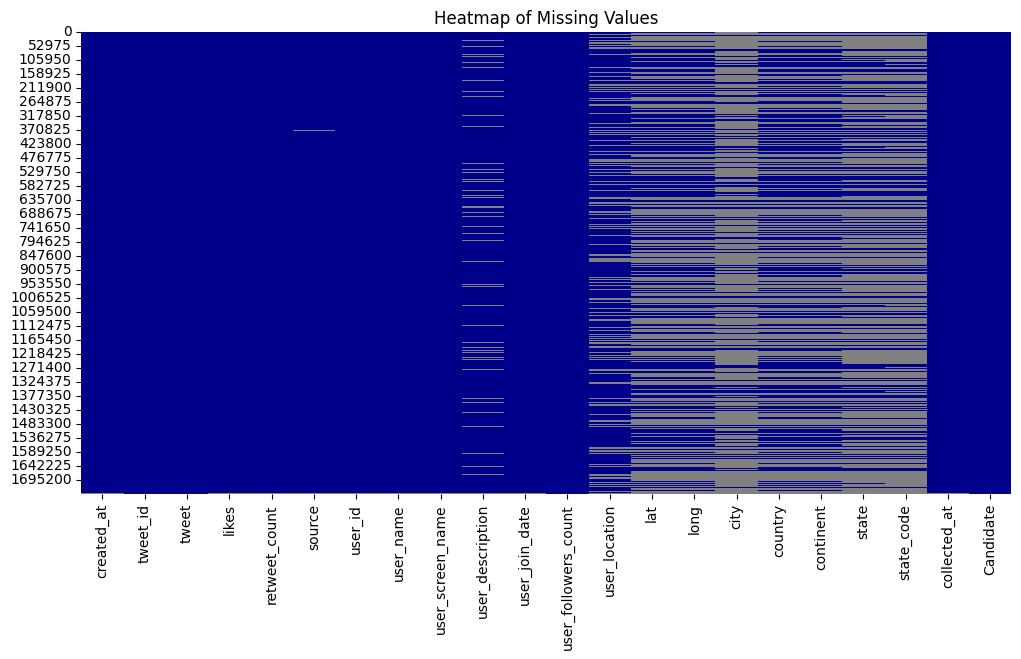

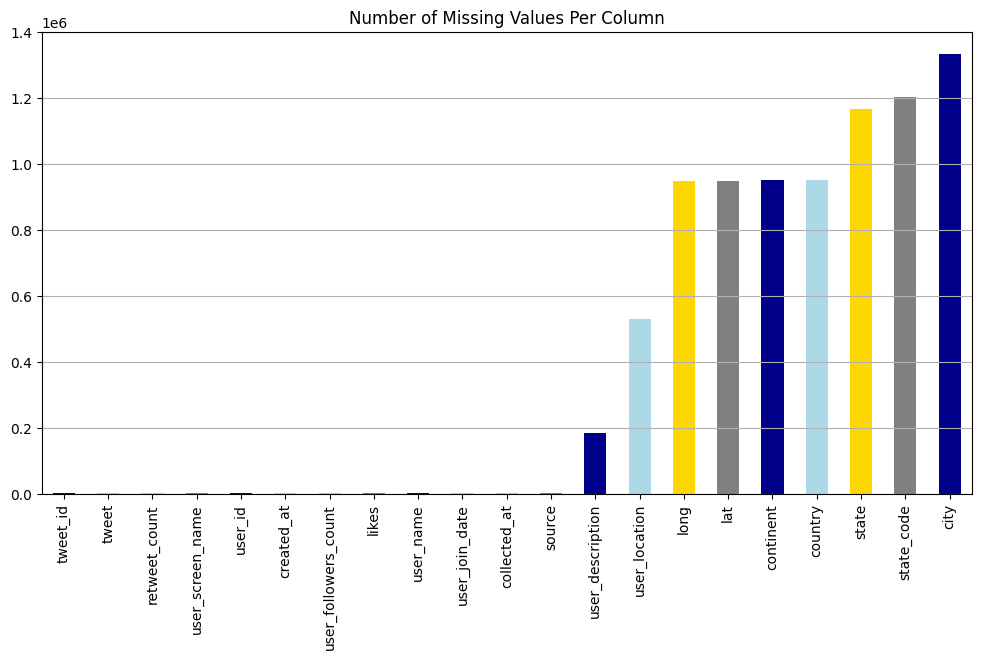

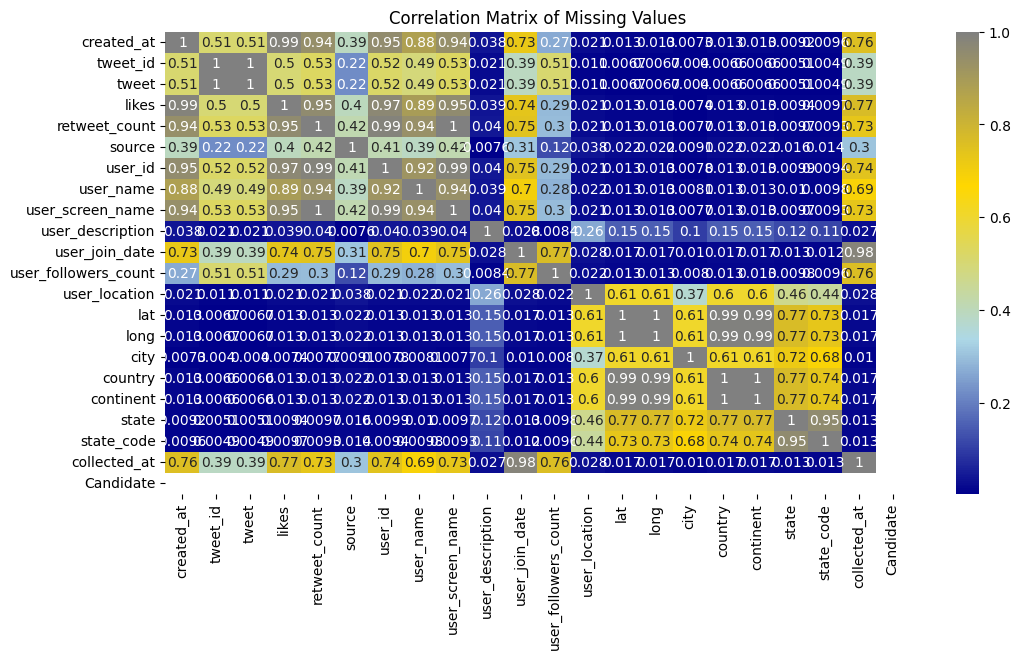

In [ ]:
visualize_missing_values(trump_biden_df)

In [ ]:
def plot_activity(trump_biden_df, date_column='created_at', candidate_column='Candidate', time_freq='D', date_format=None):
    # Handle non-date values in the 'created_at' column
    try:
        # Attempt to convert to datetime, coerce errors to NaT (Not a Time)
        if date_format:
            trump_biden_df[date_column] = pd.to_datetime(trump_biden_df[date_column], format=date_format, errors='coerce') # Use trump_biden_df instead of df
        else:
            trump_biden_df[date_column] = pd.to_datetime(trump_biden_df[date_column], errors='coerce') # Use trump_biden_df instead of df
    except ValueError as e:
        print(f"Error converting '{date_column}' to datetime: {e}")

    # Drop rows with NaT (invalid dates) in the 'created_at' column
    trump_biden_df = trump_biden_df.dropna(subset=[date_column]) # Use trump_biden_df instead of df

    # Resample the data to get the count of tweets per time period
    tweet_counts = trump_biden_df.groupby([candidate_column, pd.Grouper(key=date_column, freq=time_freq)])['tweet'].count().unstack(candidate_column).fillna(0) # Use trump_biden_df instead of df

    # Plot the data
    fig, ax = plt.subplots(figsize=(14, 8))

    # Define custom colors for the candidates
    colors = ['#002366', '#FFD700']  # Dark blue and gold

    tweet_counts.plot(ax=ax, linewidth=2, color=colors)

    # Set the title and axis labels
    ax.set_title('Tweet Activity Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Tweets')

    # Set the legend
    ax.legend(title='Candidate')

    # Customize grid and background
    plt.grid(True, which='both', axis='both')

    plt.show()

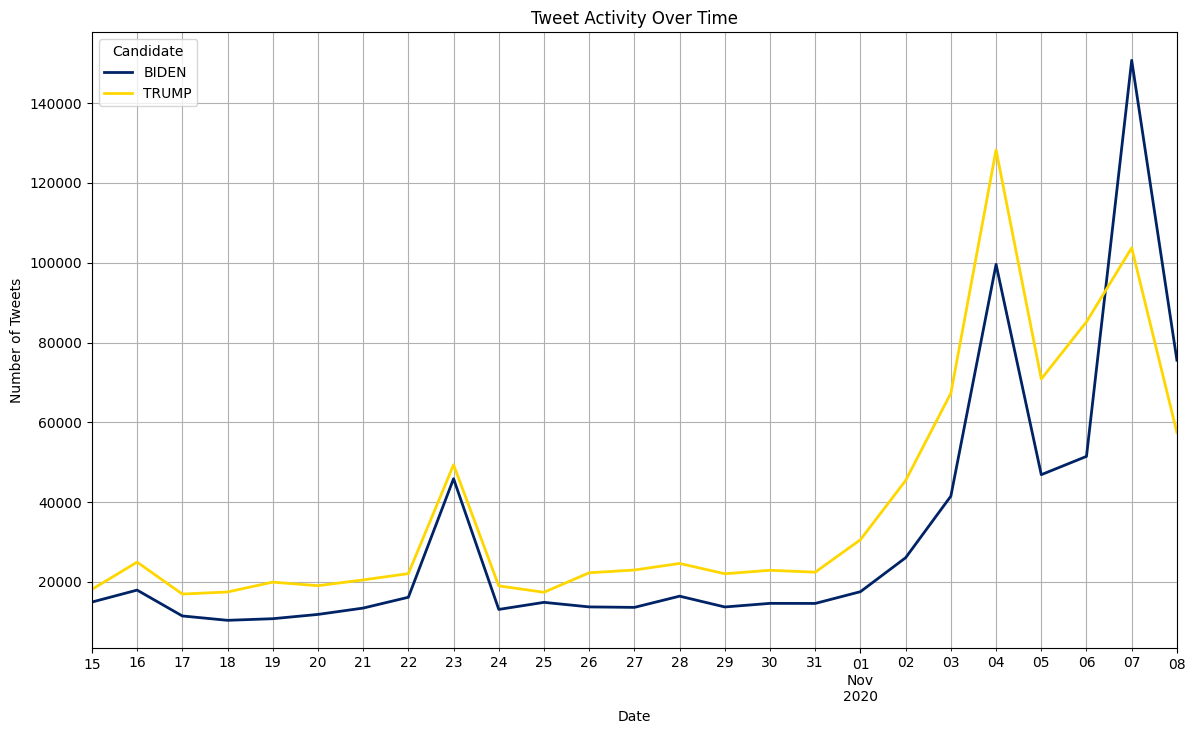

In [ ]:
plot_activity(trump_biden_df, date_format='%Y-%m-%d %H:%M:%S')

In [ ]:
def visualize_sentiment_distribution(trump_biden_df):
    # Check if 'sentiment' column exists
    if 'sentiment' not in trump_biden_df.columns:
        raise ValueError("The dataframe does not contain a 'sentiment' column.")

    # Count the number of positive and negative tweets
    sentiment_counts = trump_biden_df['sentiment'].value_counts()

    # Define custom colors: 0 = negative (gold), 1 = positive (navy)
    custom_colors = ['gold', 'navy']

    # Plot the distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Blues')
    plt.title('Distribution of Positive and Negative Tweets')
    plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
    plt.ylabel('Number of Tweets')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.show()


visualize_sentiment_distribution(trump_biden_df)
